In [1]:
import numpy as np 
import tensorflow as tf 
from tensorflow import keras 
from sklearn.metrics import accuracy_score
import cv2
import os

In [2]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            img = cv2.resize(img, (64, 64))  # Resize images to the desired dimensions
            images.append(img)
    return images

In [3]:
# Load training images and labels for each emotion
train_images_happy = load_images_from_folder(r"C:\Users\kisha\Downloads\Training_emotion\train\happy")
train_labels_happy = [0] * len(train_images_happy)

train_images_fear = load_images_from_folder(r"C:\Users\kisha\Downloads\Training_emotion\train\fearful") 
train_labels_fear = [1] * len(train_images_fear)

train_images_angry = load_images_from_folder(r"C:\Users\kisha\Downloads\Training_emotion\train\angry")
train_labels_angry = [2] * len(train_images_angry)

# Concatenate images and labels
train_images = np.concatenate([train_images_happy, train_images_fear, train_images_angry]) 
train_labels = np.concatenate([train_labels_happy, train_labels_fear, train_labels_angry])

# Shuffle training data
random_indices = np.random.permutation(len(train_images))
train_images = train_images[random_indices]
train_labels = train_labels[random_indices]

In [4]:
train_images = train_images.astype('float32') / 255.0

In [5]:

# Define and compile the model
model = keras.Sequential([
    keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.Flatten(),
     keras.layers.Dropout(0.5),  # Dropout layer for regularization
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(3, activation='softmax')  
     # 3 classes: happy, fearful, angry
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [6]:
# Train the model
model.fit(train_images, train_labels, epochs=15, batch_size=32)

# Load and preprocess test images
test_images_happy = load_images_from_folder(r"C:\Users\kisha\Downloads\Testing_emotion\happy")
test_labels_happy = [0] * len(test_images_happy)

test_images_fear = load_images_from_folder(r"C:\Users\kisha\Downloads\Testing_emotion\fearful") 
test_labels_fear = [1] * len(test_images_fear)

test_images_angry = load_images_from_folder(r"C:\Users\kisha\Downloads\Testing_emotion\angry") 
test_labels_angry = [2] * len(test_images_angry)

test_images = np.concatenate([test_images_happy, test_images_fear, test_images_angry]) 
test_labels = np.concatenate([test_labels_happy, test_labels_fear, test_labels_angry])

test_images = test_images.astype('float32') / 255.0

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


Epoch 1/15


451/451 [==============================] - 45s 97ms/step - loss: 1.0216 - accuracy: 0.4879
Epoch 2/15
451/451 [==============================] - 42s 93ms/step - loss: 0.8721 - accuracy: 0.5857
Epoch 3/15
451/451 [==============================] - 42s 93ms/step - loss: 0.7881 - accuracy: 0.6345
Epoch 4/15
451/451 [==============================] - 43s 95ms/step - loss: 0.7209 - accuracy: 0.6766
Epoch 5/15
451/451 [==============================] - 43s 95ms/step - loss: 0.6739 - accuracy: 0.6961
Epoch 6/15
451/451 [==============================] - 43s 94ms/step - loss: 0.6315 - accuracy: 0.7207
Epoch 7/15
451/451 [==============================] - 43s 96ms/step - loss: 0.5922 - accuracy: 0.7393
Epoch 8/15
451/451 [==============================] - 43s 95ms/step - loss: 0.5463 - accuracy: 0.7643
Epoch 9/15
451/451 [==============================] - 43s 95ms/step - loss: 0.4925 - accuracy: 0.7928
Epoch 10/15
451/451 [==============================] - 43s 95ms/step - loss: 0.4

1/1 [==============================] - 0s 23ms/step
Predicted Emotion: happy


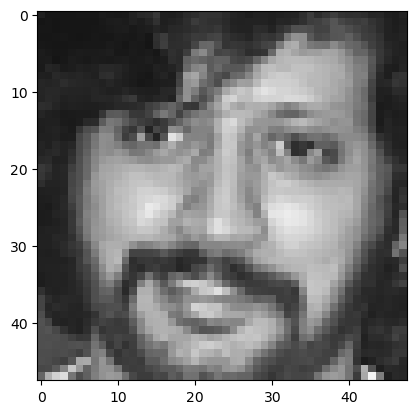

In [8]:

import matplotlib.pyplot as plt
image_path = r'C:\Users\kisha\Downloads\Testing_emotion\happy\im997.png'
input_image = cv2.imread(image_path)
resized_image = cv2.resize(input_image, (64, 64))
input_image_resized=np.array([resized_image])
predictions = model.predict(input_image_resized)
predicted_class = np.argmax(predictions)
emotions_map = {0: "happy", 1: "fear", 2: "angry"}
predicted_emotion = emotions_map[predicted_class] 
plt.imshow(input_image)
print("Predicted Emotion:", predicted_emotion)